In [1]:
if True:
    import debugpy
    
    # Try to listen on the port, catch exception if already listening
    try:
        debugpy.listen(("localhost", 5678))
        print("Debugpy is listening on localhost:5678")
    except RuntimeError as e:
        print(f"Debugpy is already listening: {e}")

Debugpy is already listening: Can't listen for client connections: [Errno 98] Address already in use


Input tensor shape: torch.Size([2, 2, 32])
No Latent KV cache
No RoPE K cache
Visualizing RoPE K vector pairs

Position 0 dimensions:
Dimension 0: Original=(0.4529, -0.6891), Rotated=(0.4529, -0.6891)
Dimension 1: Original=(-0.3194, -0.1952), Rotated=(-0.3194, -0.1952)
Dimension 2: Original=(-0.0881, 0.8972), Rotated=(-0.0881, 0.8972)
Dimension 3: Original=(0.2260, -0.3672), Rotated=(0.2260, -0.3672)
Dimension 4: Original=(-0.4354, -0.4384), Rotated=(-0.4354, -0.4384)
Dimension 5: Original=(-0.5706, -0.8092), Rotated=(-0.5706, -0.8092)
Dimension 6: Original=(-0.5515, 0.0956), Rotated=(-0.5515, 0.0956)
Dimension 7: Original=(-0.4388, 0.0300), Rotated=(-0.4388, 0.0300)


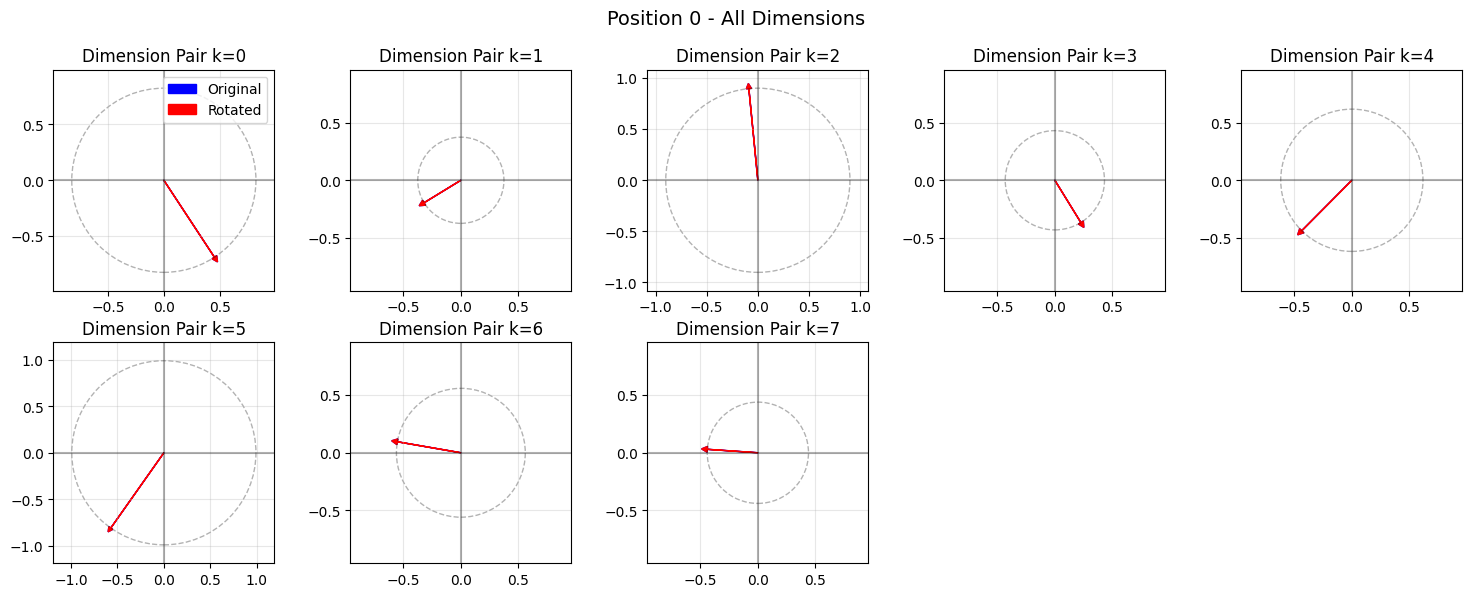


Position 1 dimensions:
Dimension 0: Original=(0.6536, -0.5707), Rotated=(0.8334, 0.2416)
Dimension 1: Original=(-0.4653, -0.9767), Rotated=(-0.1385, -1.0730)
Dimension 2: Original=(-0.0882, 0.1637), Rotated=(-0.1041, 0.1541)
Dimension 3: Original=(-0.2874, 0.0482), Rotated=(-0.2888, 0.0391)
Dimension 4: Original=(-0.2488, -1.1872), Rotated=(-0.2369, -1.1896)
Dimension 5: Original=(-0.2278, -0.9016), Rotated=(-0.2250, -0.9023)
Dimension 6: Original=(-0.0366, 0.0436), Rotated=(-0.0366, 0.0436)
Dimension 7: Original=(-0.4660, -0.1154), Rotated=(-0.4660, -0.1155)


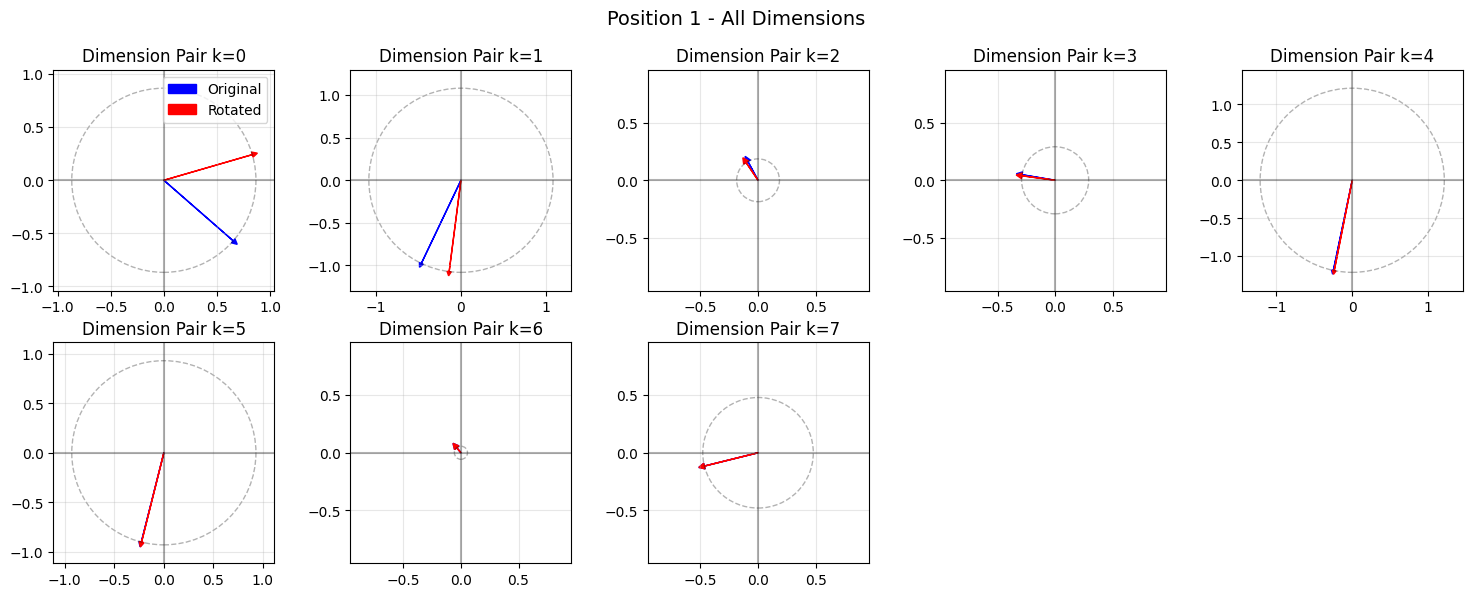

Visualizing RoPE Q vector pairs

Position 0 dimensions:
Dimension 0: Original=(-0.5059, 0.3812), Rotated=(-0.5059, 0.3812)
Dimension 1: Original=(0.1040, 0.4009), Rotated=(0.1040, 0.4009)
Dimension 2: Original=(0.2118, -0.3877), Rotated=(0.2118, -0.3877)
Dimension 3: Original=(0.2354, -0.3526), Rotated=(0.2354, -0.3526)
Dimension 4: Original=(0.2530, -0.2969), Rotated=(0.2530, -0.2969)
Dimension 5: Original=(-0.4146, -0.1462), Rotated=(-0.4146, -0.1462)
Dimension 6: Original=(-0.1285, 0.2103), Rotated=(-0.1285, 0.2103)
Dimension 7: Original=(0.2111, 0.2716), Rotated=(0.2111, 0.2716)


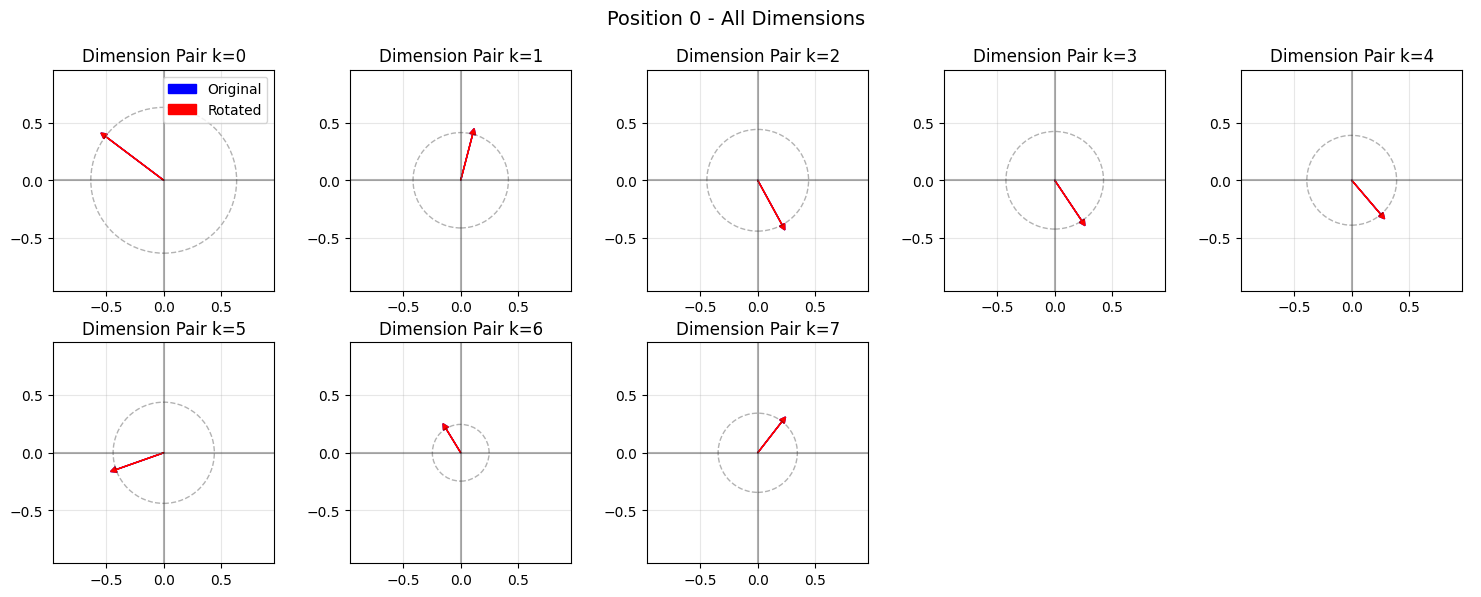


Position 1 dimensions:
Dimension 0: Original=(-0.6476, 0.5767), Rotated=(-0.8352, -0.2334)
Dimension 1: Original=(0.1734, 0.5510), Rotated=(-0.0065, 0.5776)
Dimension 2: Original=(0.1642, -0.6281), Rotated=(0.2261, -0.6086)
Dimension 3: Original=(0.1654, -0.4600), Rotated=(0.1799, -0.4546)
Dimension 4: Original=(0.0517, -0.4930), Rotated=(0.0566, -0.4925)
Dimension 5: Original=(-0.3751, -0.4220), Rotated=(-0.3737, -0.4232)
Dimension 6: Original=(-0.1404, 0.3905), Rotated=(-0.1408, 0.3903)
Dimension 7: Original=(0.5286, 0.3552), Rotated=(0.5285, 0.3554)


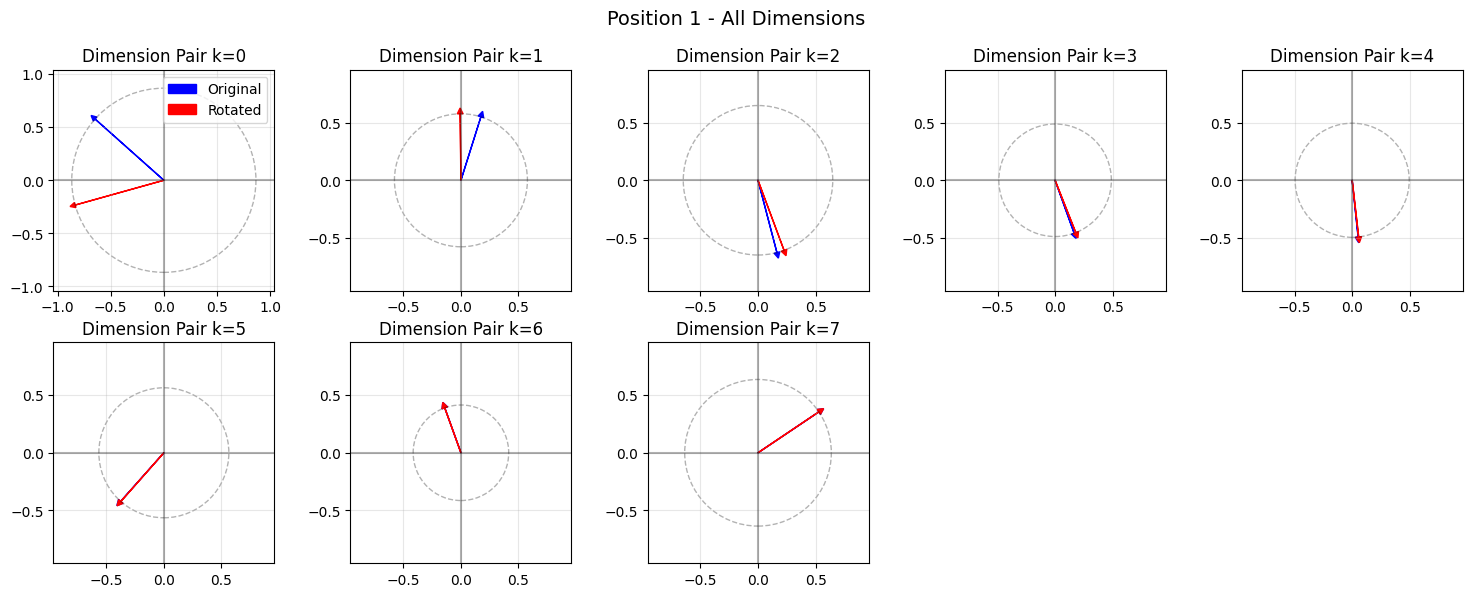

out.shape torch.Size([2, 2, 32]) latent_kv_cache.shape torch.Size([2, 2, 4]) kr_cache.shape torch.Size([2, 2, 32])


In [2]:
import torch
from utils import MLAConfig
from attention import MultiHeadLatentAttention

# Setup example parameters
batch_size = 2
seq_len = 2

# Create an instance of the model
config = MLAConfig(vocab_size=10000, num_heads=2, d_model=32)
model = MultiHeadLatentAttention(config)

# Create a random input tensor using the config dimensions
x = torch.randn(batch_size, seq_len, config.d_model)
print(f"Input tensor shape: {x.shape}")  # Should be [2, 10, 256] with default config

out, latent_kv_cache, kr_cache = model(x)
print("out.shape", out.shape,
    "latent_kv_cache.shape", latent_kv_cache.shape, "kr_cache.shape", kr_cache.shape)

Latent KV cache torch.Size([2, 2, 4])
RoPE K cache torch.Size([2, 2, 32])
Visualizing RoPE K vector pairs

Position 0 dimensions:
Dimension 0: Original=(0.4529, -0.6891), Rotated=(0.4529, -0.6891)
Dimension 1: Original=(-0.3194, -0.1952), Rotated=(-0.3194, -0.1952)
Dimension 2: Original=(-0.0881, 0.8972), Rotated=(-0.0881, 0.8972)
Dimension 3: Original=(0.2260, -0.3672), Rotated=(0.2260, -0.3672)
Dimension 4: Original=(-0.4354, -0.4384), Rotated=(-0.4354, -0.4384)
Dimension 5: Original=(-0.5706, -0.8092), Rotated=(-0.5706, -0.8092)
Dimension 6: Original=(-0.5515, 0.0956), Rotated=(-0.5515, 0.0956)
Dimension 7: Original=(-0.4388, 0.0300), Rotated=(-0.4388, 0.0300)


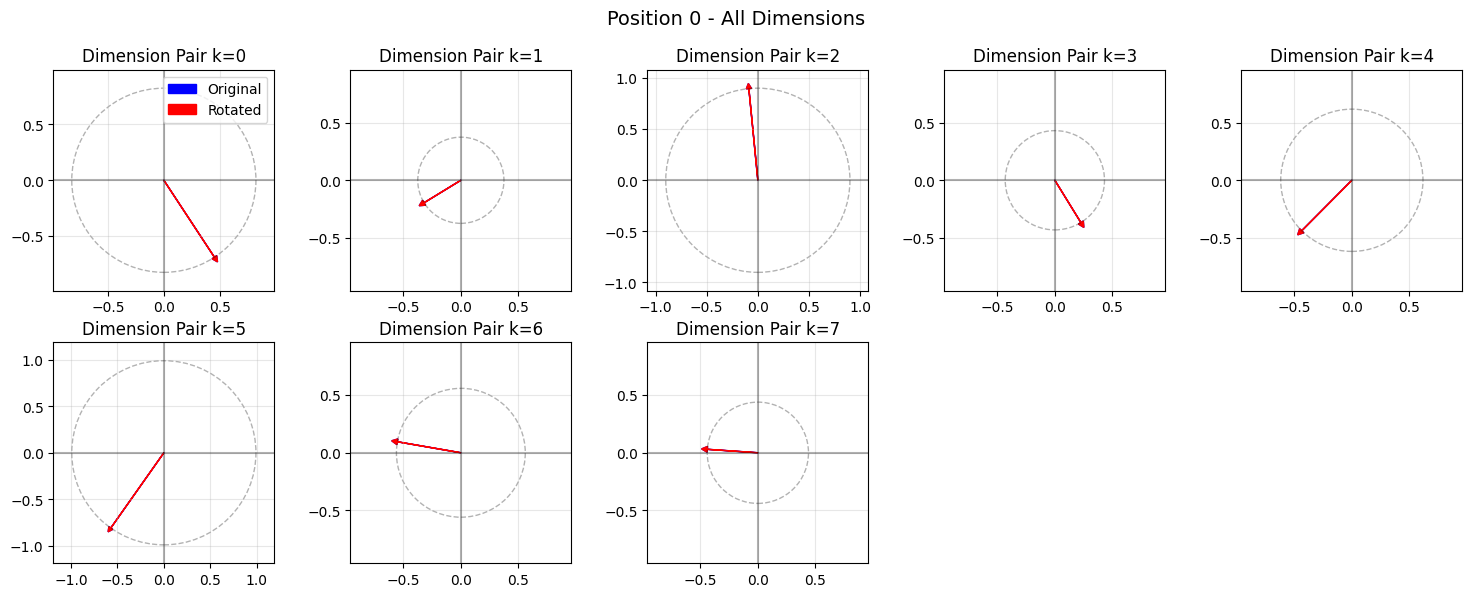


Position 1 dimensions:
Dimension 0: Original=(0.6536, -0.5707), Rotated=(0.8334, 0.2416)
Dimension 1: Original=(-0.4653, -0.9767), Rotated=(-0.1385, -1.0730)
Dimension 2: Original=(-0.0882, 0.1637), Rotated=(-0.1041, 0.1541)
Dimension 3: Original=(-0.2874, 0.0482), Rotated=(-0.2888, 0.0391)
Dimension 4: Original=(-0.2488, -1.1872), Rotated=(-0.2369, -1.1896)
Dimension 5: Original=(-0.2278, -0.9016), Rotated=(-0.2250, -0.9023)
Dimension 6: Original=(-0.0366, 0.0436), Rotated=(-0.0366, 0.0436)
Dimension 7: Original=(-0.4660, -0.1154), Rotated=(-0.4660, -0.1155)


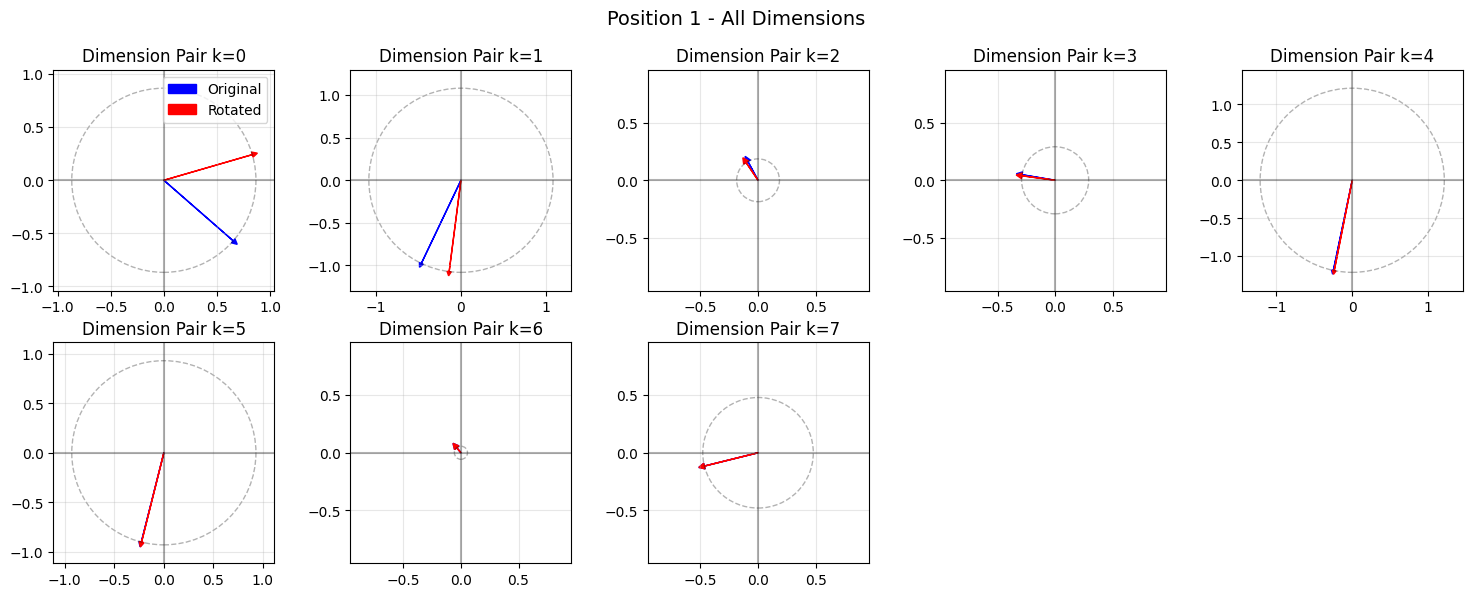


Position 2 dimensions:
Dimension 0: Original=(0.4907, -0.1967), Rotated=(-0.0253, 0.5281)
Dimension 1: Original=(0.0021, -0.0169), Rotated=(0.0116, -0.0124)
Dimension 2: Original=(0.4098, 0.1333), Rotated=(0.3752, 0.2121)
Dimension 3: Original=(0.1612, -0.9462), Rotated=(0.2207, -0.9341)
Dimension 4: Original=(0.0151, -0.6483), Rotated=(0.0280, -0.6479)
Dimension 5: Original=(-0.6402, -0.3327), Rotated=(-0.6380, -0.3368)
Dimension 6: Original=(0.2921, -0.8924), Rotated=(0.2939, -0.8919)
Dimension 7: Original=(0.0574, -0.0986), Rotated=(0.0575, -0.0985)


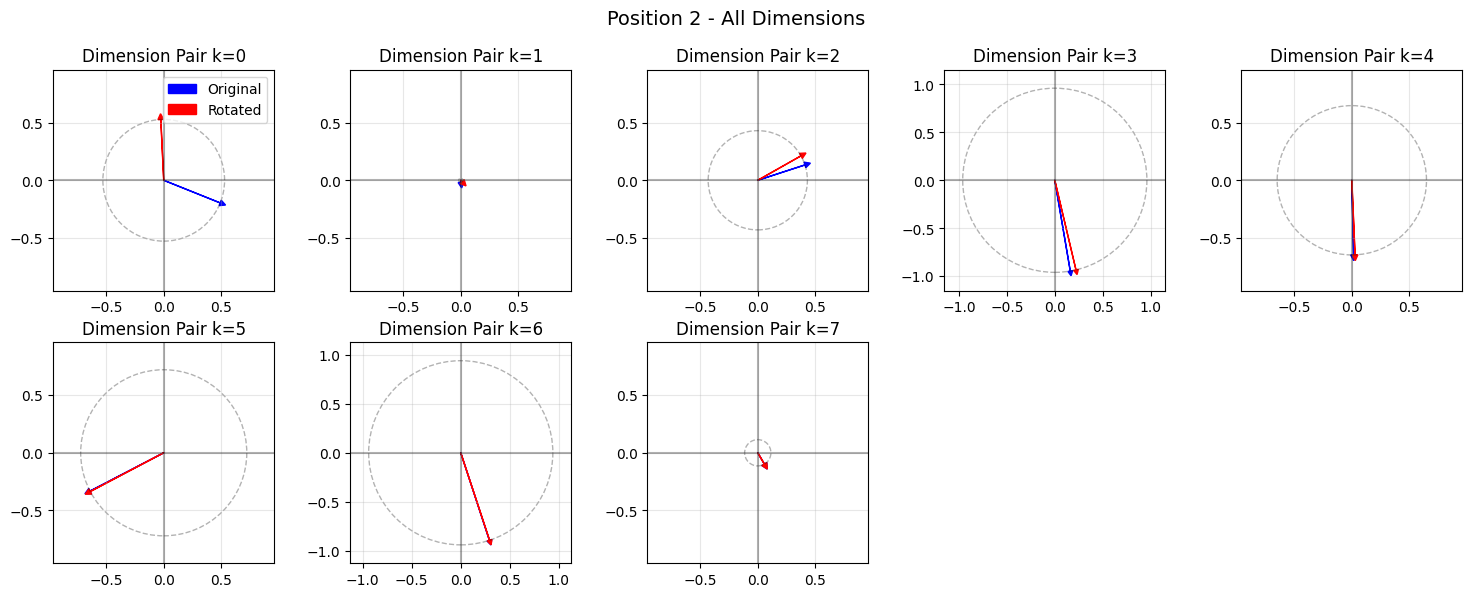

Visualizing RoPE Q vector pairs

Position 0 dimensions:
Dimension 0: Original=(-0.0566, 0.1515), Rotated=(-0.1142, -0.1145)
Dimension 1: Original=(0.7275, 0.3682), Rotated=(0.3692, 0.7270)
Dimension 2: Original=(-0.1314, -0.0210), Rotated=(-0.1246, -0.0467)
Dimension 3: Original=(-0.0283, 0.0106), Rotated=(-0.0289, 0.0088)
Dimension 4: Original=(0.6201, -0.4529), Rotated=(0.6291, -0.4404)
Dimension 5: Original=(-0.0258, 0.3093), Rotated=(-0.0277, 0.3092)
Dimension 6: Original=(-0.2733, 0.3101), Rotated=(-0.2739, 0.3096)
Dimension 7: Original=(-0.3321, 0.4903), Rotated=(-0.3324, 0.4901)


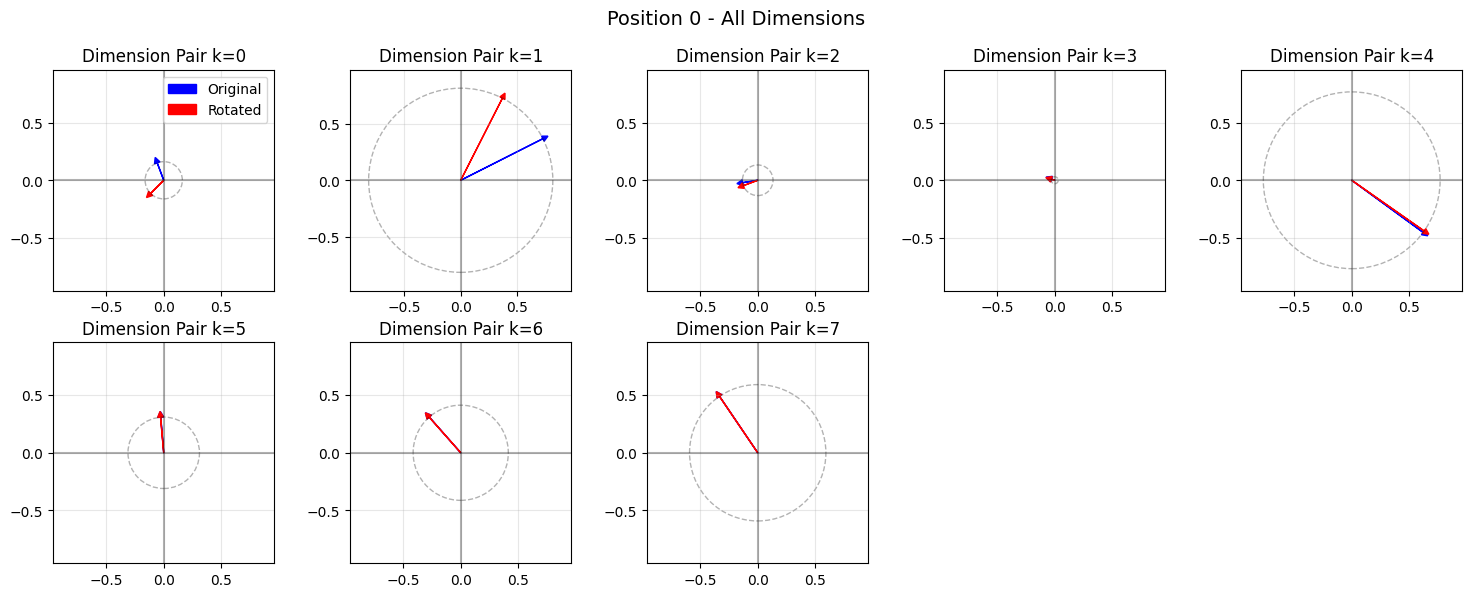

out.shape torch.Size([2, 3, 32]) latent_kv_cache.shape torch.Size([2, 3, 4]) kr_cache.shape torch.Size([2, 3, 32])


In [3]:
new_x = torch.randn(batch_size, 1, config.d_model)
out, latent_kv_cache, kr_cache = model(new_x, latent_kv_cache, kr_cache)
print("out.shape", out.shape,
    "latent_kv_cache.shape", latent_kv_cache.shape, "kr_cache.shape", kr_cache.shape)